In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("application_record.csv", encoding = 'utf-8') 
record = pd.read_csv("credit_record.csv", encoding = 'utf-8')

In [4]:
print(data.shape)
print(record.shape)

(438557, 18)
(1048575, 3)


In [5]:
data.sort_values(by=['ID'])

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423317,7999660,F,N,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-13432,-5446,1,0,0,0,Core staff,1.0
426434,7999696,F,N,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-12576,-4382,1,0,0,0,Medicine staff,4.0
432885,7999738,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9970,-119,1,0,0,0,NaN,2.0
421225,7999784,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10630,-454,1,0,0,0,NaN,3.0


In [6]:
data.groupby(['ID']).count()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
5008805,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
5008806,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5008808,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5008809,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999660,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7999696,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7999738,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1


In [7]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
#agrupar los usuarios y obtener el minimo valor del balance del mes
begin_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month

,MONTHS_BALANCE
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [9]:
#renombrar la columna 
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
begin_month

,begin_month
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [10]:
#fusionar el dataframe principal con los valores de la columna begin_month
new_data=pd.merge(data,begin_month,how="left",on="ID")

In [11]:
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


In [12]:
new_data.shape

(438557, 19)

#### Generalmente, los usuarios en riesgo deberían estar en el 3%, por lo que elijo a los usuarios que tienen más de 60 días de retraso como usuarios de riesgo objetivo. Esas muestras están marcadas como '1', de lo contrario, son '0'.

>ID: 
                Número de cliente
>MONTHS_BALANCE: 
                 El mes de los datos extraídos es el punto de partida, hacia atrás, 
>                * 0 es el mes actual, 
>                * -1 es el mes anterior, y así sucesivamente
>ESTADO 
>                0: 1-29 días de atraso 
>                1: 30-59 días de atraso 
>                2: 60-89 días de atraso 
>                3: 90-119 días de atraso 
>                4: 120-149 días de atraso 
>                5: Deudas vencidas o incobrables, cancelaciones por más de 150 días
>                C: Pagado ese mes
>                X: sin préstamo durante el mes

In [13]:
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes'

In [14]:
record.head()

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None


In [15]:
record.tail()

,ID,MONTHS_BALANCE,STATUS,dep_value
1048570,5150487,-25,C,None
1048571,5150487,-26,C,None
1048572,5150487,-27,C,None
1048573,5150487,-28,C,None
1048574,5150487,-29,C,None


In [16]:
# contar los valores dep_value agrupados por ID 
cpunt=record.groupby('ID').count()
cpunt.head()

,MONTHS_BALANCE,STATUS,dep_value
ID,,,
5001711,4,4,0
5001712,19,19,0
5001713,22,22,0
5001714,15,15,0
5001715,60,60,0


In [17]:
# Yes -> los clientes que tienen mas de 60 dias de retraso
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes'
cpunt['dep_value'][cpunt['dep_value'] == 0]='No'

In [18]:
cpunt.head()

,MONTHS_BALANCE,STATUS,dep_value
ID,,,
5001711,4,4,No
5001712,19,19,No
5001713,22,22,No
5001714,15,15,No
5001715,60,60,No


In [19]:
cpunt.tail()

,MONTHS_BALANCE,STATUS,dep_value
ID,,,
5150482,18,18,No
5150483,18,18,No
5150484,13,13,No
5150485,2,2,No
5150487,30,30,No


In [20]:
cpunt = cpunt[['dep_value']]

In [21]:
cpunt.head()

,dep_value
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No


In [22]:
cpunt.shape

(45985, 1)

In [23]:
# fusionar new_data con dep_value (variable a predecir)
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')

In [24]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,No


In [25]:
new_data.shape

(36457, 20)

In [26]:
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0

In [27]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


In [28]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

#### Features

In [29]:
#renombrar columnas
new_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)

In [30]:
new_data.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


In [31]:
#valores unicos de application
len(set(application['ID']))

NameError: name 'application' is not defined

In [ ]:
#valores unicos de credit
len(set(credit['ID']))

In [ ]:
#valores en comun de application y credit
len(set(application['ID']).intersection(set(credit['ID'])))

In [ ]:
new_data.shape

## Identificar y manejar valores perdidos

In [ ]:
#crear dataframe con valores booleanos para validar los missing value
missing_data = new_data.isnull()

In [ ]:
# validamos los missing value para todas las columnas excepto el ID
for column in missing_data.columns.values.tolist():
    if column != 'ID':
        print(column)
        print (missing_data[column].value_counts())
        print("")

##### columnas con valores NaN: occyp

In [ ]:
# numero de usuarios por ocupacion
new_data.groupby(["occyp"])['ID'].count().sort_values(ascending = False)

In [ ]:
#numero de usuarios por ocupacion
plot = new_data['occyp'].value_counts().plot(kind='bar',title='Tipos de Ocupacion')
plot.grid()

In [ ]:
# promedio de sueldos anuales por ocupacion (verificar relacion directa)
new_data.groupby(["occyp"])['inc'].mean().sort_values(ascending = False)

#### opcion 1:
proceso que recorra todas las filas, al encontrar un ocupacion=NaN, verificar en que rango de sueldo se encuentra para asignarle un ocupacion de acuerdo a sus ingresos anuales

#### opcion 2:
eliminar las columnas o filas que contengn NaN

In [ ]:
# resguardamos la data hasta este punto
df_bkp=new_data

In [ ]:
# opcion 2, eliminar valores perdidos
new_data.dropna()
new_data = new_data.mask(new_data == 'NULL').dropna()

In [ ]:
# verificamos la dimension del dataset
new_data.shape

In [ ]:
new_data.head()

### analizando datos

In [ ]:
# numero de aprobados por genero
g = sns.catplot(x="target",col="Gender",
                data=new_data, kind="count",
                height=4, aspect=0.7);

In [ ]:
# grafico de los promedios de sueldos por ocupacion
a=new_data.groupby(["occyp"])['inc'].mean().sort_values(ascending = False).plot(kind='barh')

In [ ]:
plot = new_data['inctp'].value_counts().plot(kind='bar', title='Usuarios evaluados')
plot.grid()

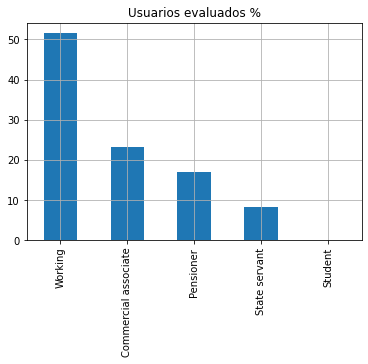

In [32]:
plot = (100 * new_data['inctp'].value_counts() / len(new_data['inctp'])).plot(
kind='bar', title='Usuarios evaluados %')
plot.grid()

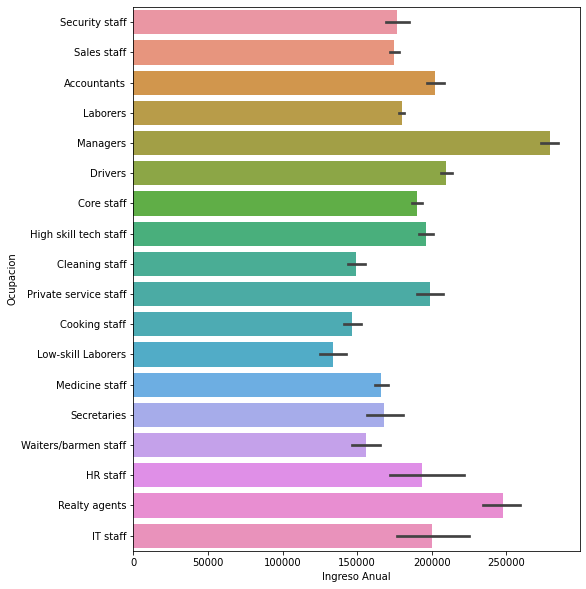

In [33]:
# Ingresos anuales por Ocupacion
plt.figure(figsize=(8,10))
sns.barplot(x=new_data['inc'], y= new_data['occyp'])
plt.ylabel('Ocupacion')
plt.xlabel('Ingreso Anual')
plt.show()

## Relacionando variables categóricas

In [34]:
# Tabla de contingencia ingreso anuales / ocupacion
pd.crosstab(index=new_data['occyp'],
            columns=new_data['inc'], margins=True)

inc,27000.0,31500.0,32400.0,36000.0,36900.0,40500.0,45000.0,47250.0,49500.0,51750.0,...,765000.0,787500.0,810000.0,900000.0,945000.0,990000.0,1125000.0,1350000.0,1575000.0,All
occyp,,,,,,,,,,,,,,,,,,,,,
Accountants,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1241
Cleaning staff,0,8,0,1,0,9,8,0,2,1,...,0,0,0,0,0,0,0,0,0,551
Cooking staff,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,655
Core staff,0,0,0,2,0,0,16,0,0,0,...,0,0,0,6,0,4,0,0,0,3591
Drivers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2138
HR staff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85
High skill tech staff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,1383
IT staff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
Laborers,0,0,0,2,2,0,6,1,1,0,...,0,0,2,1,0,0,0,0,0,6211


### Formato correcto de los datos

In [ ]:
new_data.dtypes

In [ ]:
#new_data['Gender']=new_data['dep_value']
new_data.loc[new_data['Gender']=='Yes','target']=1
new_data.loc[new_data['Gender']=='No','target']=0

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

In [ ]:
pd.crosstab(index=new_data['target'],
            columns=new_data['occyp'], margins=True)